In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
import random

import vrpSolver
# %matplotlib notebook

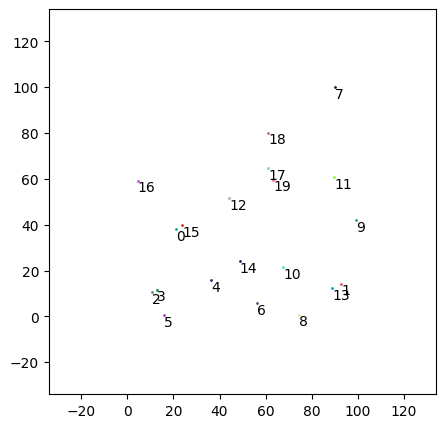

In [2]:
# Generate and plot instance
nodes = vrpSolver.rndNodes(
    N = 20,
    distr = 'UniformSquareXY',
    xRange = (0, 100),
    yRange = (0, 100)
)
fig, ax = vrpSolver.plotNodes(
    nodes = nodes, 
    boundingBox = (-20, 120, -20, 120)
)

In [3]:
for n in nodes:
    nodes[n]['price'] = 100 * random.random()

In [4]:
# DFJ with lazy cut
DFJ_Lazy = vrpSolver.solveTSP(
    nodes = nodes, 
    edges = 'Euclidean',
    algo = 'IP',
    fml = 'DFJ_Lazy',
    solver = 'Gurobi',
    detailsFlag = False,
    outputFlag = False)

In [5]:
DFJ_Lazy

{'ofv': 398.385419254073,
 'seq': [0,
  3,
  2,
  5,
  4,
  14,
  10,
  6,
  8,
  13,
  1,
  9,
  11,
  7,
  18,
  17,
  19,
  12,
  16,
  15,
  0],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 398.385419254073,
 'upperBound': 398.385419254073,
 'runtime': 0.014570236206054688}

In [6]:
tau, _ = vrpSolver.matrixDist(
    nodes = nodes,
    edges = 'Euclidean')

In [7]:
tau[4, 2]

26.33446784182793

In [8]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'MTZ'
)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 460 rows, 400 columns and 2643 nonzeros
Model fingerprint: 0xe7b8e59b
Variable types: 20 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e-01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 88.5075911
Presolve removed 40 rows and 0 columns
Presolve time: 0.01s
Presolved: 420 rows, 400 columns, 2592 nonzeros
Variable types: 20 continuous, 380 integer (380 binary)

Root relaxation: objective 8.508113e+02, 210 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  850.81134    0   26   88.50759  850.81134   861%     -    0s
H    0     0                    

In [9]:
OP

{'ofv': 643.1626554277386,
 'dist': 197.95106435866074,
 'seq': [4, 14, 6, 8, 10, 19, 17, 12, 15, 0, 3, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 643.1626554277386,
 'upperBound': 643.1626554277386,
 'runtime': 0.9288501739501953}

In [10]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'])

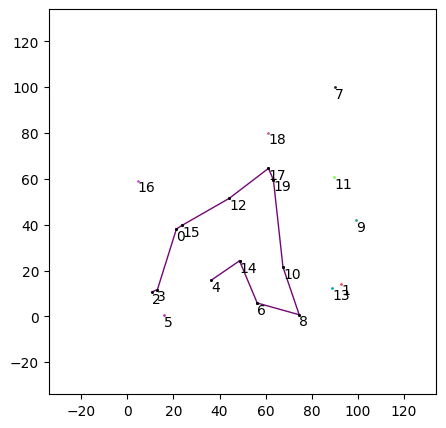

In [11]:
fig

In [12]:
OP = vrpSolver.solveOP(
    nodes = nodes,
    startID = 4,
    endID = 2,
    maxBudget = 200,
    algo = "IP",
    solver = "Gurobi",
    fml = 'DFJ_Lazy'
)

Set parameter LazyConstraints to value 1
Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (win64)
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads
Optimize a model with 40 rows, 380 columns and 1463 nonzeros
Model fingerprint: 0x294a5799
Variable types: 0 continuous, 380 integer (380 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [2e-01, 9e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Found heuristic solution: objective 151.1234135
Presolve time: 0.00s
Presolved: 40 rows, 380 columns, 1452 nonzeros
Variable types: 0 continuous, 380 integer (380 binary)

Root relaxation: objective 8.544922e+02, 68 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  854.49225    0    2  151.12341  854.49225   465%     -    0s
H    0     0                     4

In [13]:
OP

{'ofv': 643.1626554277386,
 'dist': 197.95106435866074,
 'seq': [4, 14, 6, 8, 10, 19, 17, 12, 15, 0, 3, 2],
 'gap': 0,
 'solType': 'IP_Optimal',
 'lowerBound': 643.1626554277386,
 'upperBound': 643.1626554277386,
 'runtime': 0.4218616485595703}

In [ ]:
fig, ax = vrpSolver.plotNodeSeq(
    fig = fig,
    ax = ax,
    nodes = nodes,
    nodeSeq = OP['seq'],
    lineColor = 'red')
fig